In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

# Loading dataframes & preliminary cleaning / EDA / Scoping

In [34]:
df = pd.read_csv('all_data.csv')

In [35]:
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [36]:
df.rename(columns = {"Life expectancy at birth (years)": 'LE'}, inplace=True)

In [37]:
df.columns

Index(['Country', 'Year', 'LE', 'GDP'], dtype='object')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  96 non-null     object 
 1   Year     96 non-null     int64  
 2   LE       96 non-null     float64
 3   GDP      96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [39]:
df.describe(include='all')

,Country,Year,LE,GDP
count,96,96.000000,96.000000,9.600000e+01
unique,6,NaN,NaN,NaN
top,Chile,NaN,NaN,NaN
freq,16,NaN,NaN,NaN
mean,NaN,2007.500000,72.789583,3.880499e+12
std,NaN,4.633971,10.672882,5.197561e+12
min,NaN,2000.000000,44.300000,4.415703e+09
25%,NaN,2003.750000,74.475000,1.733018e+11
50%,NaN,2007.500000,76.750000,1.280220e+12
75%,NaN,2011.250000,78.900000,4.067510e+12


In [40]:
df.isna().sum()

Country    0
Year       0
LE         0
GDP        0
dtype: int64

In [41]:
df[df.isnull().any(axis=1)]

,Country,Year,LE,GDP


In [42]:
df.duplicated().sum()

0

In [43]:
df.Country.value_counts()

Chile                       16
China                       16
Germany                     16
Mexico                      16
United States of America    16
Zimbabwe                    16
Name: Country, dtype: int64

In [44]:
df.Year.value_counts()

2000    6
2001    6
2002    6
2003    6
2004    6
2005    6
2006    6
2007    6
2008    6
2009    6
2010    6
2011    6
2012    6
2013    6
2014    6
2015    6
Name: Year, dtype: int64

## First look around

The data spans 2000 - 2015 and includes six countries: Chile, China, Germany, Mexico, the United States and Zimbabwe. 
There is no data missing and there are no duplicates. The column names match their data types. Overall, the data appears squeaky clean. 
GDP and life expectancy per country per year are made available. 

# Analysis
Load in years and countries so that they are easily accessible as reusable variables: 

In [45]:
years = list(df.Year.unique())

In [46]:
years

[2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015]

In [47]:
countries = list(df.Country.unique())

In [48]:
countries

['Chile', 'China', 'Germany', 'Mexico', 'United States of America', 'Zimbabwe']

## Life Expectancy over time - all countries 

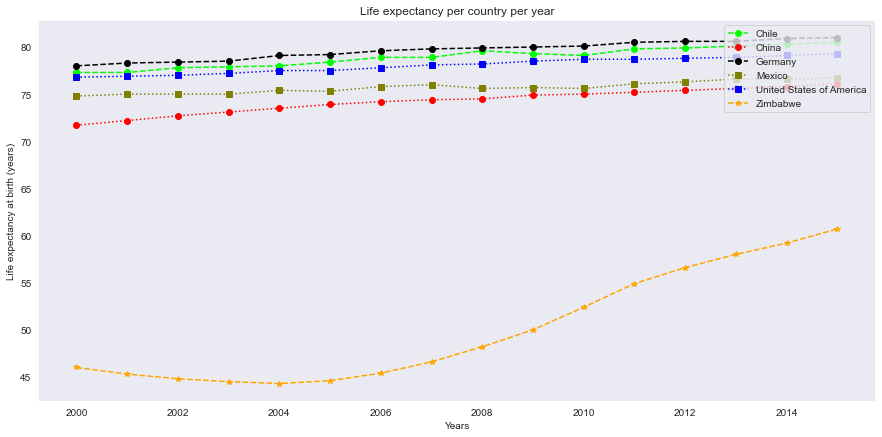

In [49]:
plt.figure(figsize=(15, 7))

plt.plot(years, df.LE[df.Country == 'Chile'], color='lime', linestyle='--', 
marker='o')
plt.plot(years, df.LE[df.Country == 'China'], color='red', linestyle=':', 
marker='o')
plt.plot(years, df.LE[df.Country == 'Germany'], color='black', linestyle='--', 
marker='o')
plt.plot(years, df.LE[df.Country == 'Mexico'], color='olive', linestyle=':', 
marker='s')
plt.plot(years, df.LE[df.Country == 'United States of America'], color='blue', linestyle=':', 
marker='s')
plt.plot(years, df.LE[df.Country == 'Zimbabwe'], color='orange', linestyle='--', 
marker='*')

plt.xlabel('Years')
plt.ylabel('Life expectancy at birth (years)')
plt.title('Life expectancy per country per year')
plt.legend(countries, loc=1)

sns.set_style('darkgrid') 

plt.show() 
plt.clf() 
plt.close('all')

## GDP over time - all countries

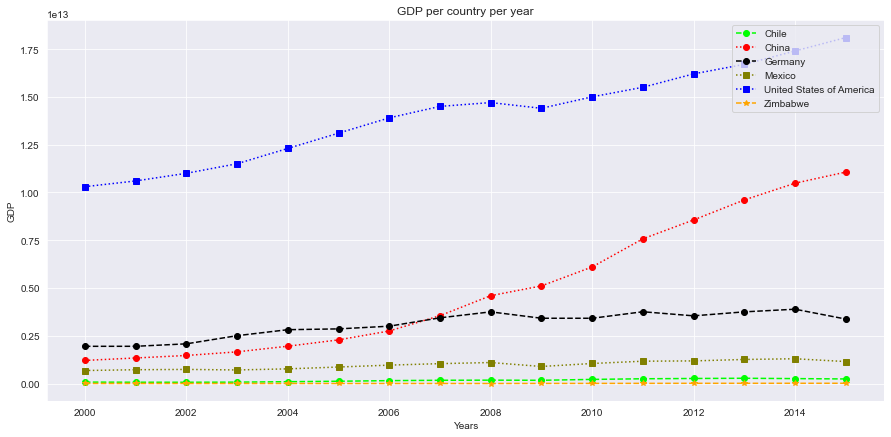

In [50]:
plt.figure(figsize=(15, 7))

plt.plot(years, df.GDP[df.Country == 'Chile'], color='lime', linestyle='--', 
marker='o')
plt.plot(years, df.GDP[df.Country == 'China'], color='red', linestyle=':', 
marker='o')
plt.plot(years, df.GDP[df.Country == 'Germany'], color='black', linestyle='--', 
marker='o')
plt.plot(years, df.GDP[df.Country == 'Mexico'], color='olive', linestyle=':', 
marker='s')
plt.plot(years, df.GDP[df.Country == 'United States of America'], color='blue', linestyle=':', 
marker='s')
plt.plot(years, df.GDP[df.Country == 'Zimbabwe'], color='orange', linestyle='--', 
marker='*')

plt.xlabel('Years')
plt.ylabel('GDP')
plt.title('GDP per country per year')
plt.legend(countries, loc=1)

sns.set_style('whitegrid') 
plt.show() 
plt.clf() 
plt.close('all')

Interestingly, GDP and life expectancy do not seem to correlated over the same time period; or perhaps they are correlated but with lag. So for example, the Chinese GDP increased dramatically, while the life expectancy did not. 
In the same vein, the GDP of Zimbabwe remains relatively stable, but the life expectancy increased dramatically. Political unrest, shortages of food and fuel, and runaway inflation during the 2000s might have been to blame. 

It might be worthwhile to compare GDP vs life expectancy per country for more insights. Seeing as the units of measurement are vastly different, separate plots side by side may aid understanding. 

Very broadly speaking, both GDP and life expectancy seem to rise over time. 

## GDP vs Life Expectancy by Country

### Chile

Though GDP increases substantially, life expectancy increases only slightly, then once the GDP decreases, life expectancy continues to rise. This does not seem to indicate correlation.  

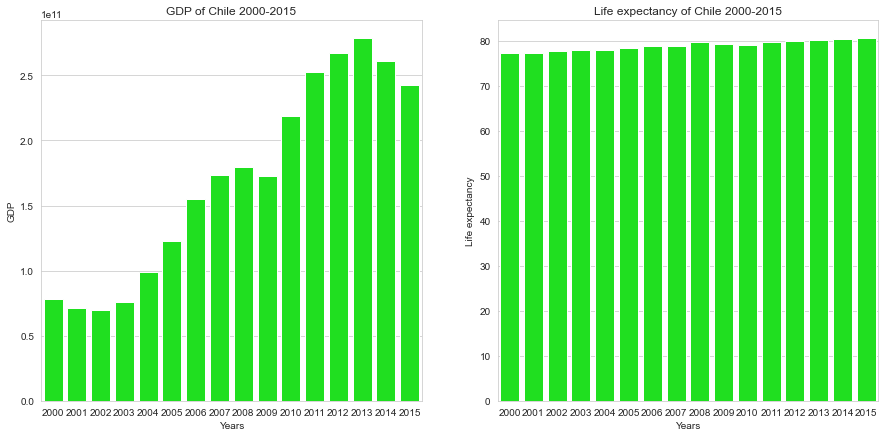

In [51]:
plt.figure(figsize=(15, 7))


ax1 = plt.subplot(1,2,1)
ax1 = sns.barplot(x=years, y=df.GDP[df.Country == 'Chile'], data=df, color='lime')
plt.xlabel('Years')
plt.ylabel('GDP')
plt.title('GDP of Chile 2000-2015')

ax2 = plt.subplot(1,2,2)
ax2 = sns.barplot(x=years, y=df.LE[df.Country == 'Chile'], data=df, color='lime')
plt.xlabel('Years')
plt.ylabel('Life expectancy')
plt.title('Life expectancy of Chile 2000-2015')


sns.set_style('dark')
plt.show()
plt.close()


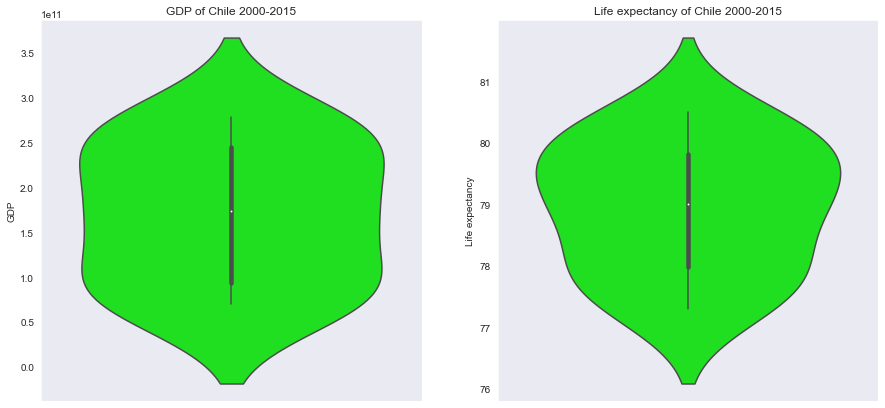

In [52]:
plt.figure(figsize=(15, 7))


ax1 = plt.subplot(1,2,1)
ax1 = sns.violinplot(y=df.GDP[df.Country == 'Chile'], data=df, color='lime')
plt.ylabel('GDP')
plt.title('GDP of Chile 2000-2015')

ax2 = plt.subplot(1,2,2)
ax2 = sns.violinplot(y=df.LE[df.Country == 'Chile'], data=df, color='lime')
plt.ylabel('Life expectancy')
plt.title('Life expectancy of Chile 2000-2015')


sns.set_style('dark')

### China
Once more, rapid rise in GDP does not appear to correlate with a rise in life expectancy, at least not directly, proportionally. Longitudinal data measured over a greater number of years might be helpful.
Interestingly, China appears to be the only country not to be affected by the big crash of 2008. 

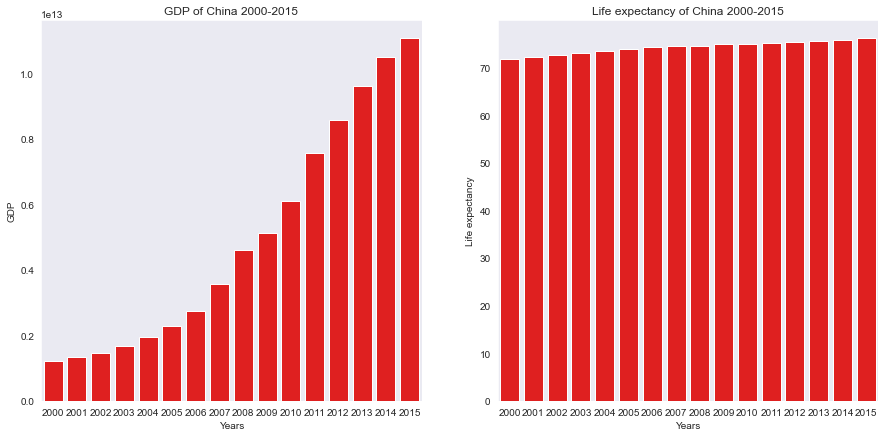

In [53]:
plt.figure(figsize=(15, 7))

ax1 = plt.subplot(1,2,1)
ax1 = sns.barplot(x=years, y=df.GDP[df.Country == 'China'], data=df, color='red')
plt.xlabel('Years')
plt.ylabel('GDP')
plt.title('GDP of China 2000-2015')

ax2 = plt.subplot(1,2,2)
ax2 = sns.barplot(x=years, y=df.LE[df.Country == 'China'], data=df, color='red')
plt.xlabel('Years')
plt.ylabel('Life expectancy')
plt.title('Life expectancy of China 2000-2015')


sns.set_style('dark') 

plt.show() 

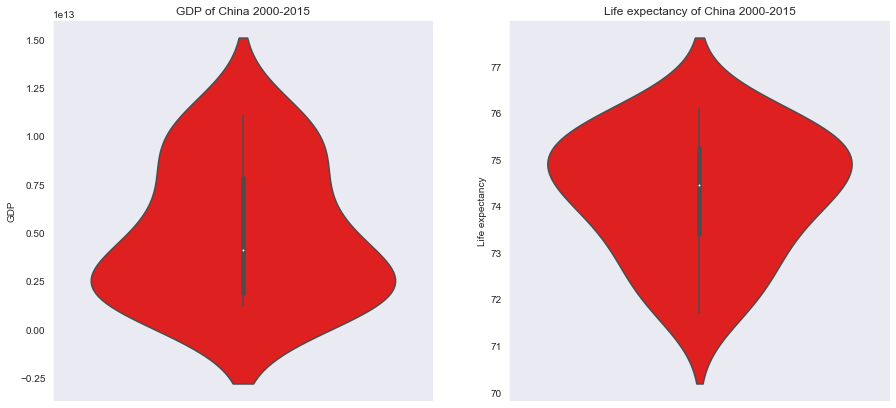

In [54]:
plt.figure(figsize=(15, 7))

ax1 = plt.subplot(1,2,1)
ax1 = sns.violinplot(y=df.GDP[df.Country == 'China'], data=df, color='red')
plt.ylabel('GDP')
plt.title('GDP of China 2000-2015')

ax2 = plt.subplot(1,2,2)
ax2 = sns.violinplot(y=df.LE[df.Country == 'China'], data=df, color='red')
plt.ylabel('Life expectancy')
plt.title('Life expectancy of China 2000-2015')


sns.set_style('dark') 

plt.show() 

### Germany
Just like Chile, Germany's GDP seems to take a dip in 2015, but the overall trend of a rise in life expectancy does not seem to be disrupted by this. 

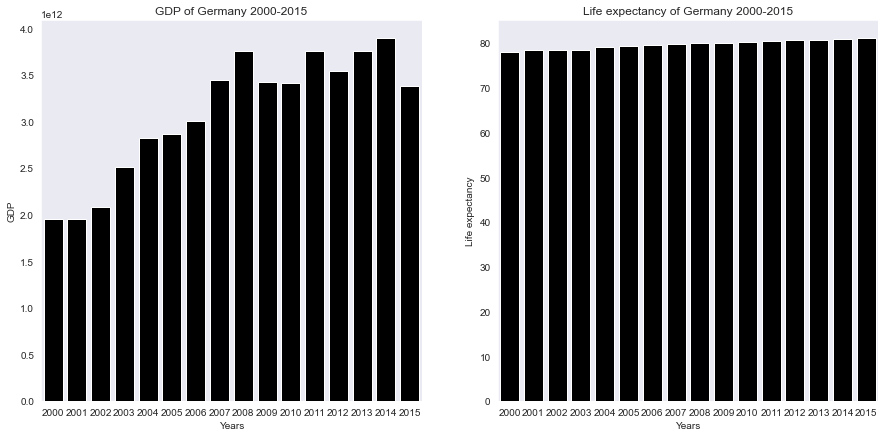

In [55]:
plt.figure(figsize=(15, 7))

ax1 = plt.subplot(1,2,1)
ax1 = sns.barplot(x=years, y=df.GDP[df.Country == 'Germany'], data=df, color='black')
plt.xlabel('Years')
plt.ylabel('GDP')
plt.title('GDP of Germany 2000-2015')

ax2 = plt.subplot(1,2,2)
ax2 = sns.barplot(x=years, y=df.LE[df.Country == 'Germany'], data=df, color='black')
plt.xlabel('Years')
plt.ylabel('Life expectancy')
plt.title('Life expectancy of Germany 2000-2015')


sns.set_style('dark') 

plt.show() 

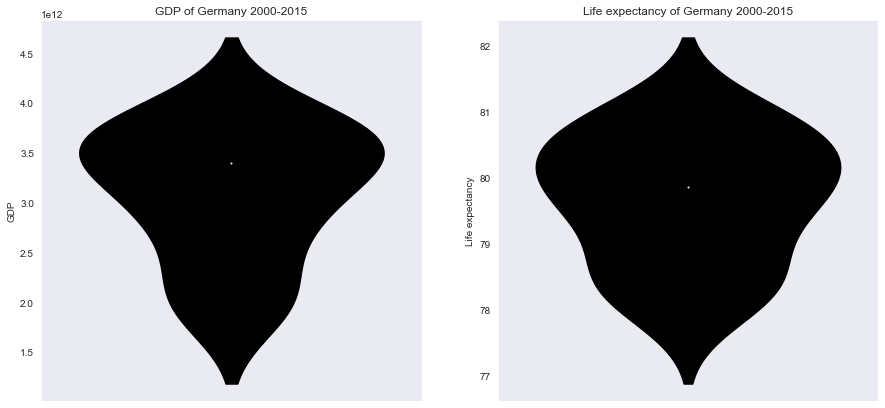

In [56]:
plt.figure(figsize=(15, 7))

ax1 = plt.subplot(1,2,1)
ax1 = sns.violinplot(y=df.GDP[df.Country == 'Germany'], data=df, color='black', alpha=0.5)
plt.ylabel('GDP')
plt.title('GDP of Germany 2000-2015')

ax2 = plt.subplot(1,2,2)
ax2 = sns.violinplot(y=df.LE[df.Country == 'Germany'], data=df, color='black', alpha=0.5)
plt.ylabel('Life expectancy')
plt.title('Life expectancy of Germany 2000-2015')


sns.set_style('dark') 

plt.show() 

### Mexico 
Just like the other countries in the dataset except for China, Mexico seems to experience a dip in 2009 following the 2008 crisis. Life expectancy appears unrelated to this variable. 

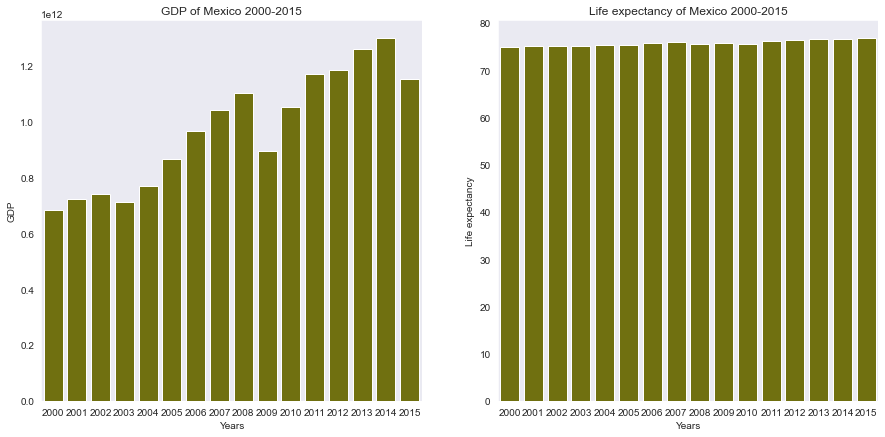

In [57]:
plt.figure(figsize=(15, 7))

ax1 = plt.subplot(1,2,1)
ax1 = sns.barplot(x=years, y=df.GDP[df.Country == 'Mexico'], data=df, color='olive')
plt.xlabel('Years')
plt.ylabel('GDP')
plt.title('GDP of Mexico 2000-2015')

ax2 = plt.subplot(1,2,2)
ax2 = sns.barplot(x=years, y=df.LE[df.Country == 'Mexico'], data=df, color='olive')
plt.xlabel('Years')
plt.ylabel('Life expectancy')
plt.title('Life expectancy of Mexico 2000-2015')


sns.set_style('dark') 

plt.show() 

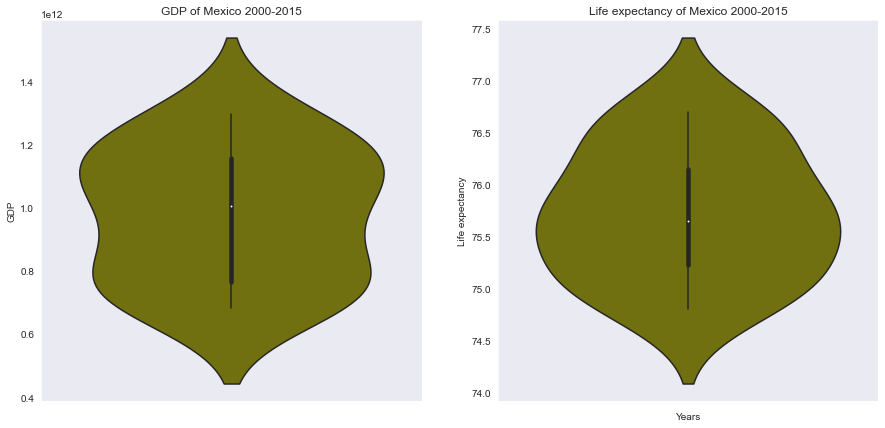

In [58]:
plt.figure(figsize=(15, 7))
#plt.subplot(1, 2, 1) 
ax1 = plt.subplot(1,2,1)
ax1 = sns.violinplot(y=df.GDP[df.Country == 'Mexico'], data=df, color='olive')
plt.ylabel('GDP')
plt.title('GDP of Mexico 2000-2015')

#plt.subplot(1, 2, 2)
ax2 = plt.subplot(1,2,2)
ax2 = sns.violinplot(y=df.LE[df.Country == 'Mexico'], data=df, color='olive')
plt.xlabel('Years')
plt.ylabel('Life expectancy')
plt.title('Life expectancy of Mexico 2000-2015')


sns.set_style('dark') 

plt.show() 

### USA
#### GDP vs Life expectancy at birth 2000 - 2015
Compared to the other countries in this dataset, GDP in the US does not appear to have taken as massive a hit, in spite of the fact that it is the country where the crash of 2008 originated. The rise in GDP seems quite linear and relatively consistent, in fact. 
Once more, life expectancy in the US appears uncorrelated to GDP. 

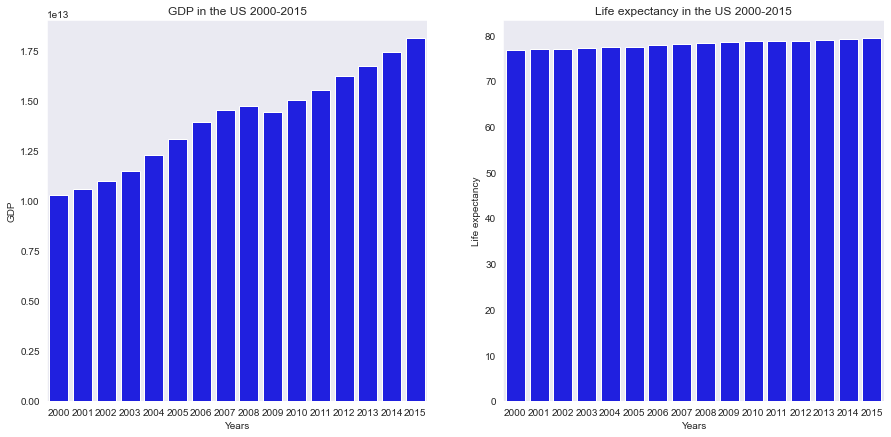

In [59]:
plt.figure(figsize=(15, 7))

#plt.subplot(1, 2, 1) 
ax1 = plt.subplot(1,2,1)
ax1 = sns.barplot(x=years, y=df.GDP[df.Country == 'United States of America'], data=df, color='blue')
plt.xlabel('Years')
plt.ylabel('GDP')
plt.title('GDP in the US 2000-2015')

#plt.subplot(1, 2, 2)
ax2 = plt.subplot(1,2,2)
ax2 = sns.barplot(x=years, y=df.LE[df.Country == 'United States of America'], data=df, color='blue')
plt.xlabel('Years')
plt.ylabel('Life expectancy')
plt.title('Life expectancy in the US 2000-2015')


sns.set_style('dark') 

plt.show() 

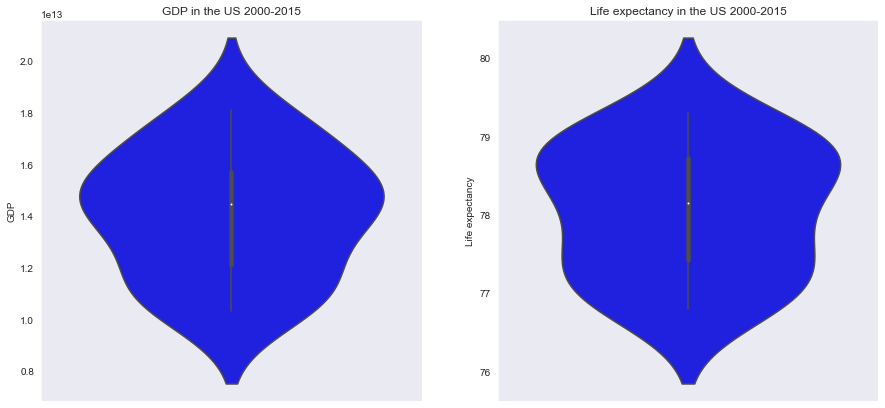

In [60]:
plt.figure(figsize=(15, 7))

ax1 = plt.subplot(1,2,1)
ax1 = sns.violinplot(y=df.GDP[df.Country == 'United States of America'], data=df, color='blue')
plt.ylabel('GDP')
plt.title('GDP in the US 2000-2015')

ax2 = plt.subplot(1,2,2)
ax2 = sns.violinplot(y=df.LE[df.Country == 'United States of America'], data=df, color='blue')
plt.ylabel('Life expectancy')
plt.title('Life expectancy in the US 2000-2015')


sns.set_style('dark') 

plt.show() 

### Zimbabwe
#### GDP vs Life expectancy at birth 2000 - 2015
Curiously, GDP and life expectancy in Zimbabwe appear ever so slightly correlated. As GDP decreases, life expectancy does, too. Conversely, as GDP rises, so does life expectancy. 

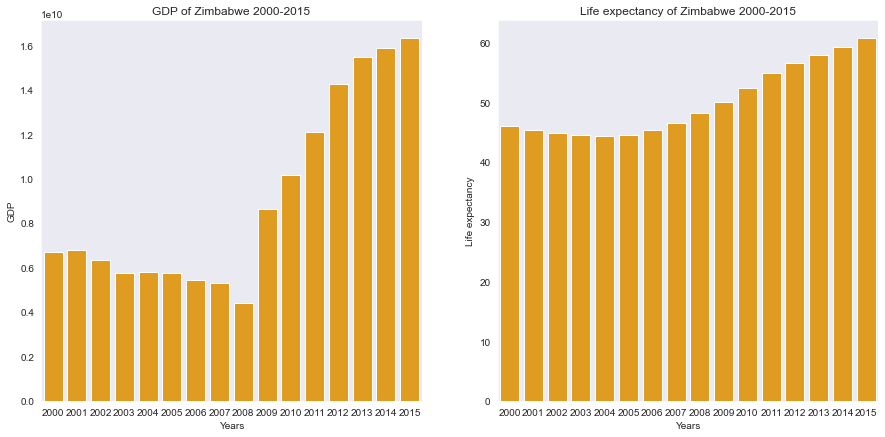

In [61]:
plt.figure(figsize=(15, 7))

#plt.subplot(1, 2, 1) 
ax1 = plt.subplot(1,2,1)
ax1 = sns.barplot(x=years, y=df.GDP[df.Country == 'Zimbabwe'], data=df, color='orange')
plt.xlabel('Years')
plt.ylabel('GDP')
plt.title('GDP of Zimbabwe 2000-2015')

#plt.subplot(1, 2, 2)
ax2 = plt.subplot(1,2,2)
ax2 = sns.barplot(x=years, y=df.LE[df.Country == 'Zimbabwe'], data=df, color='orange')
plt.xlabel('Years')
plt.ylabel('Life expectancy')
plt.title('Life expectancy of Zimbabwe 2000-2015')


sns.set_style('dark') 

plt.show() 

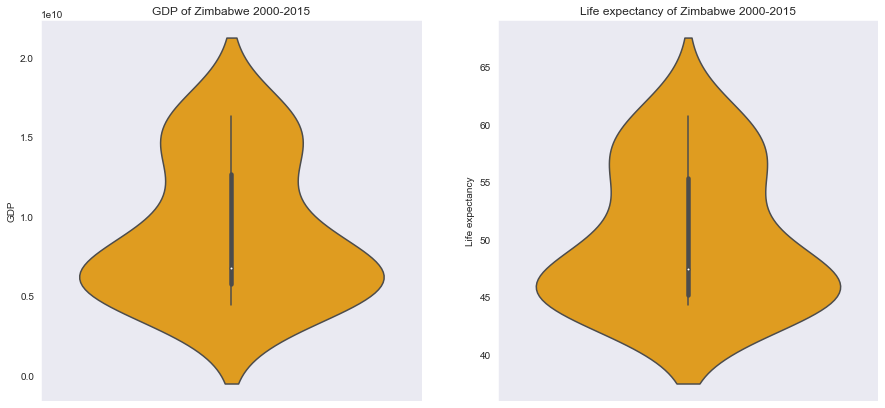

In [62]:
plt.figure(figsize=(15, 7))

ax1 = plt.subplot(1,2,1)
ax1 = sns.violinplot(y=df.GDP[df.Country == 'Zimbabwe'], data=df, color='orange')
plt.ylabel('GDP')
plt.title('GDP of Zimbabwe 2000-2015')

ax2 = plt.subplot(1,2,2)
ax2 = sns.violinplot(y=df.LE[df.Country == 'Zimbabwe'], data=df, color='orange')
plt.ylabel('Life expectancy')
plt.title('Life expectancy of Zimbabwe 2000-2015')


sns.set_style('dark') 

plt.show() 

### Analysis per Category
Now that we have looked at historic trends over time, birds eye view, plus individual analysis per country, a look 
at distributions per category (GDP and life expectancy) may prove useful: 

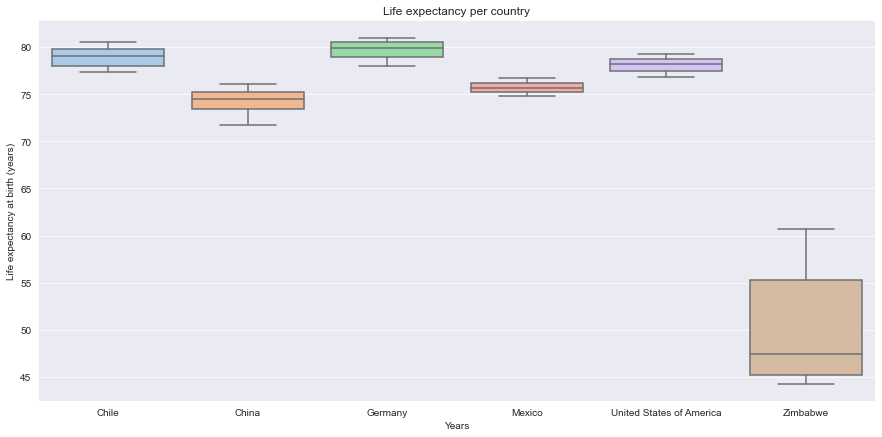

In [77]:
plt.figure(figsize=(15, 7))

sns.boxplot(data=df,y=df.LE, x=df.Country)

plt.xlabel('Years')
plt.ylabel('Life expectancy at birth (years)')
plt.title('Life expectancy per country')
#plt.legend(countries, loc=1)

sns.set_style('darkgrid') 
sns.set_palette('pastel')

plt.show() 
plt.clf() 
plt.close('all')

Germany has the highest and Zimbabwe the lowest life expectancy but with the highest amount of variancce, overall. 
On to GDPs: 

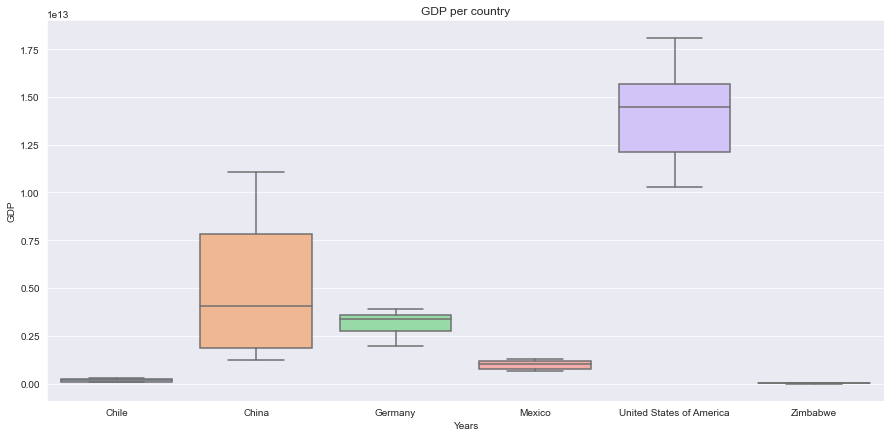

In [78]:
plt.figure(figsize=(15, 7))

sns.boxplot(data=df,y=df.GDP, x=df.Country)

plt.xlabel('Years')
plt.ylabel('GDP')
plt.title('GDP per country')
#plt.legend(countries, loc=1)

sns.set_style('darkgrid') 
sns.set_palette('pastel')

plt.show() 
plt.clf() 
plt.close('all')

China and the US have the highest GDPs but with the highest variance, as well, suggesting that the wealth gap between the two countries is possibly quite large, with the rich doing really well and the poor... not so much. In comparison, GDPs in China, Mexico and Zimbabwe are significantly less variable but also considerably lower. 

# Conclusions
Generally speaking, this dataset inspires a certain sense of confidence: Though the financial crisis of 2008 triggered decreases in GDP in all countries but China, all nations were able to bounce back. China really is an outlier here in terms of GDP growth rate, which is on the rise year over year. 

At the same time, life expectancy increased incremementally in all countries. The outlier is Zimbabwe, where life expectancy increases dramatically, possibly due to socioeconomic conditions improving. 